In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

# 예제 데이터 (심리 설문 데이터)
data = pd.read_csv(r"C:\Users\Administrator\Desktop\PADA_LAB\calculated\sentiment\amazon_sentiment.csv")

# object 타입 변수 목록 출력
removed_columns = data.select_dtypes(include=['object']).columns.tolist()
selected_columns = ['Helpfulness', 'sentiment_score_discrete', 'Rating']

removed_columns += selected_columns
print("제거된 열:", removed_columns)


# object 타입 변수 제거
data_cleaned = data.drop(columns=removed_columns)
data_cleaned

제거된 열: ['product_name', 'review_title', 'Review_Text', 'Helpfulness', 'sentiment_score_discrete', 'Rating']


,Num_of_Ratings,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,arousal
0,27618,0,34.95,348,4.6,4,38,0.4,6.96,78.75,0.732797,0.589597,4.753,-0.364289
1,27618,0,34.95,218,4.6,3,18,3.6,3.40,88.23,0.565473,0.672635,1.103,-0.078554
2,27618,0,34.95,627,4.6,6,39,1.6,7.00,78.45,0.558190,0.688002,4.002,0.099952
3,27618,0,34.95,1089,4.6,1,8,0.4,6.60,33.58,0.415284,0.762691,4.917,0.378918
4,27618,0,34.95,1046,4.6,4,22,0.6,12.01,64.07,0.375987,0.733197,4.365,0.109594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,43430,0,19.99,435,4.6,7,10,0.4,10.00,66.40,0.219230,0.948739,4.722,0.005940
89923,43430,0,19.99,290,4.6,3,11,0.4,9.47,74.35,0.560623,0.647463,4.890,0.102818
89924,43430,0,19.99,763,4.6,4,17,0.4,4.07,67.11,0.511836,0.700617,4.870,0.084424
89925,43430,0,19.99,804,4.6,2,7,0.4,8.51,64.37,0.684332,1.201002,4.631,0.056716


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# StandardScaler 적용
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)  # numpy array로 변환됨

# 데이터프레임으로 변환 (컬럼 유지)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# 변환된 데이터 확인
data_scaled_df

,Num_of_Ratings,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,arousal
0,-0.547511,-0.199104,0.204959,-1.139068,0.411891,0.003075,0.114231,-0.556085,-0.033418,-0.151874,1.389441,-0.392629,0.825348,-1.284893
1,-0.547511,-0.199104,0.204959,-1.521936,0.411891,-0.359785,-0.374057,2.528100,-0.879598,0.324147,0.553265,-0.069402,-2.246151,-0.094210
2,-0.547511,-0.199104,0.204959,-0.317373,0.411891,0.728794,0.138645,0.600484,-0.023910,-0.166938,0.516866,-0.009589,0.193377,0.649637
3,-0.547511,-0.199104,0.204959,1.043282,0.411891,-1.085504,-0.618200,-0.556085,-0.118987,-2.420004,-0.197285,0.281140,0.963355,1.812109
4,-0.547511,-0.199104,0.204959,0.916641,0.411891,0.003075,-0.276399,-0.363324,1.166923,-0.889003,-0.393666,0.166337,0.498844,0.689816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,-0.152794,-0.199104,-0.327260,-0.882840,0.411891,1.091654,-0.569372,-0.556085,0.689163,-0.772007,-1.177040,1.005336,0.799262,0.257882
89923,-0.152794,-0.199104,-0.327260,-1.309886,0.411891,-0.359785,-0.544957,-0.556085,0.563187,-0.372812,0.529026,-0.167385,0.940635,0.661579
89924,-0.152794,-0.199104,-0.327260,0.083166,0.411891,0.003075,-0.398471,-0.556085,-0.720345,-0.736355,0.285219,0.039518,0.923805,0.584928
89925,-0.152794,-0.199104,-0.327260,0.203917,0.411891,-0.722645,-0.642615,-0.556085,0.335004,-0.873939,1.147246,1.987275,0.722684,0.469470


C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\pytensor\link\c\cmodule.py:2959: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Interrupted at 4,378 [8%]: Average Loss = 2.4441e+06


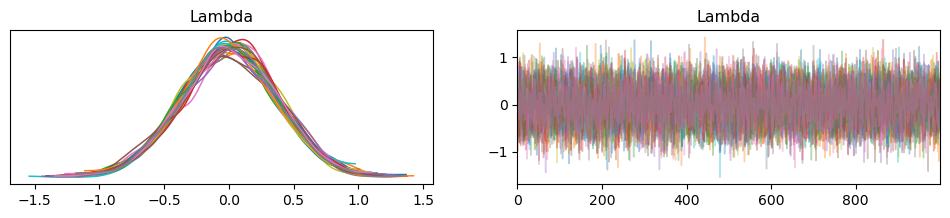

In [8]:
from factor_analyzer import FactorAnalyzer
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

# 요인 개수 지정
n_factors = 2
data_scaled = np.array(data_scaled, dtype=np.float32)
n_features = data_scaled.shape[1]
n_samples = data_scaled.shape[0]

with pm.Model() as bfa:
    # Factor Loadings (요인 적재 행렬)
    Lambda = pm.Normal("Lambda", mu=0, sigma=1, shape=(n_features, n_factors))
    
    # Latent Factors (잠재 변수)
    F = pm.Normal("F", mu=0, sigma=1, shape=(n_samples, n_factors))
    
    # Residual Variances (잔차 분산)
    psi = pm.HalfCauchy("psi", beta=1, shape=n_features)
    
    # Likelihood (관측된 데이터)
    X_obs = pm.Normal("X_obs", mu=pm.math.dot(F, Lambda.T), sigma=psi, observed=data_scaled)
    
    # Variational Inference 수행
    approx = pm.fit(n=50000, method='advi')  # 반복 횟수를 조정할 수 있습니다
    trace = approx.sample(1000)

# 결과 시각화
pm.plot_trace(trace, var_names=["Lambda"])
plt.show()